## 異常檢測
- 經典強大KNN，[參考](https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13#:~:text=kNN%20is%20a%20supervised%20ML,systems%2C%20face%20detection%20applications%20etc.)

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors  # 非監督用
from sklearn.datasets import load_iris

In [12]:
data = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])

# 輸入數據
df = data[["sepal length (cm)", "sepal width (cm)"]]
df.columns = ["sepal_length", "sepal_width"]

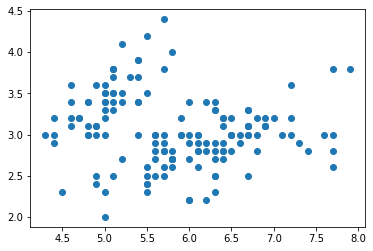

In [13]:
plt.scatter(df["sepal_length"], df["sepal_width"])

In [14]:
# 創建數組
X = df.values

In [15]:
# 實例化模型
nbrs = NearestNeighbors(n_neighbors = 3)
# 擬合模型
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

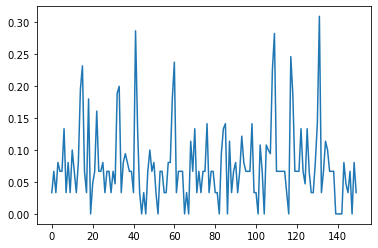

In [16]:
# k-neaighbors 與模型輸出的距離和索引
distances, indexes = nbrs.kneighbors(X)
# 繪製每個觀測值的 k 距離的平均值
plt.plot(distances.mean(axis =1))

> 由上圖可以看到每個點與其他點的平均距離，所以如果值特別大，就代表`該點`非常孤立，可能為異常的值，
> 這個方法非常直覺與好控制，解釋上也非常容易，當然需要去設定 threshold 來判斷，因此需要一些EDA探索。

In [18]:
# 直觀地確定截止值 > 0.15 


threshold = 0.15

outlier_index = np.where(distances.mean(axis = 1) > threshold) 
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131], dtype=int64),)

In [19]:
# 過濾異常值
outlier_values = df.iloc[outlier_index] 
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


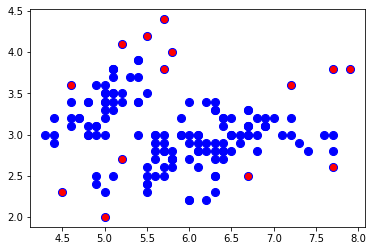

In [20]:
# 繪製數據
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b", s = 65)
# 繪製異常值
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")